In [3]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 3.9MB 34.4MB/s 
     |████████████████████████████████| 450kB 37.4MB/s 
ERROR: -ensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: -ensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1


In [5]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


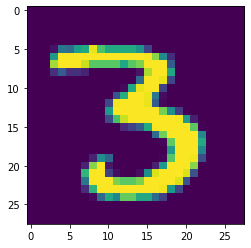

3

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[12])
plt.show()

y_train[12]

In [8]:

import numpy as np
np.amax(x_train[12])

255

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=0)
x_test = tf.keras.utils.normalize(x_test, axis=0)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [13]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1402 - accuracy: 0.9575
Epoch 2/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1127 - accuracy: 0.9659
Epoch 3/3
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0938 - accuracy: 0.9712


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


10000/10000 [==============================] - 1s 89us/sample - loss: 0.1984 - accuracy: 0.9586
0.19842231159062648 0.9586


In [15]:
model.save('mnist_nn1.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_nn1.model/assets


In [0]:
new_model = tf.keras.models.load_model('mnist_nn1.model')

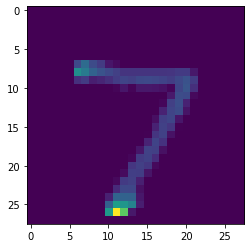

In [20]:
predictions = new_model.predict(x_test)
p =np.argmax(predictions[0])
plt.imshow(x_test[0])
plt.show()

In [0]:
p
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

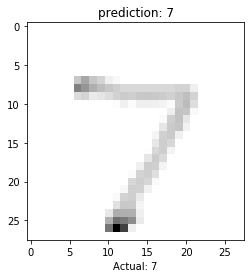

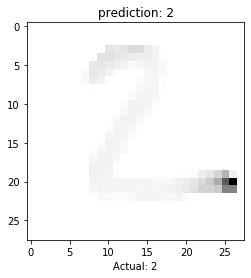

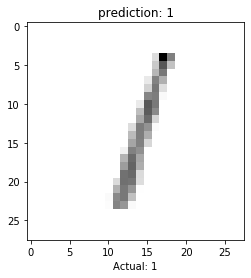

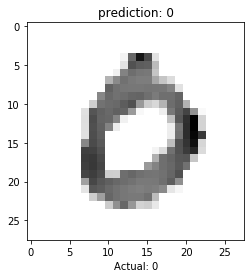

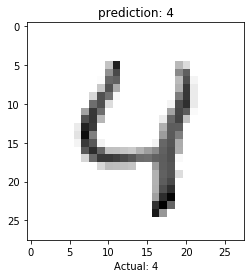

In [23]:

for i in range(5):
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: "+ str(class_names[y_test[i]]))
    plt.title("prediction: "+str(class_names[np.argmax(predictions[i])]))
    plt.show()